In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Read data

In [8]:
import scipy.io as sio
data=sio.loadmat('spikewave.mat')
spike_data=data['wave'].T
print('spike_data.shape:', spike_data.shape)

spike_data.shape: (5376, 40)


data统一成array-like of shape (n_samples, n_features)

## Plot

Text(0.5, 1.0, 'spike wave before sorting')

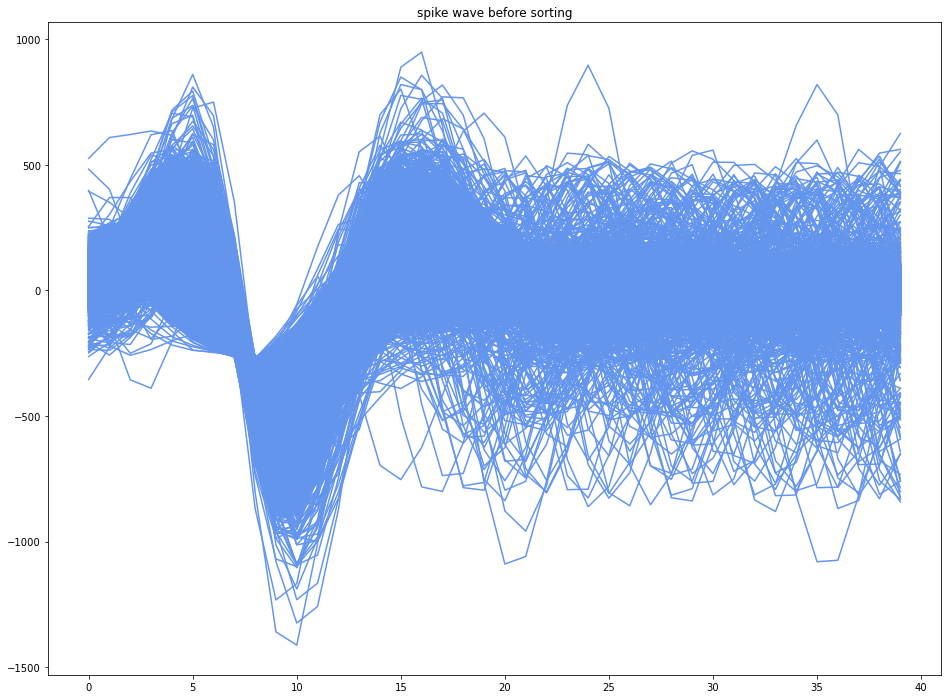

In [12]:
plt.figure(figsize=(16, 12))

for i in range(spike_data.shape[0]):
    plt.plot(range(spike_data.shape[1]), spike_data[i, :], color='cornflowerblue')

plt.title('spike wave before sorting')
plt.xlabel('sample')

把这些spike波形叠画在一起之后发现，各个波形大致形状比较相似，但是可分性很差，仅对着这一张图片，不知道如何分类。

## PCA

Text(0, 0.5, 'y')

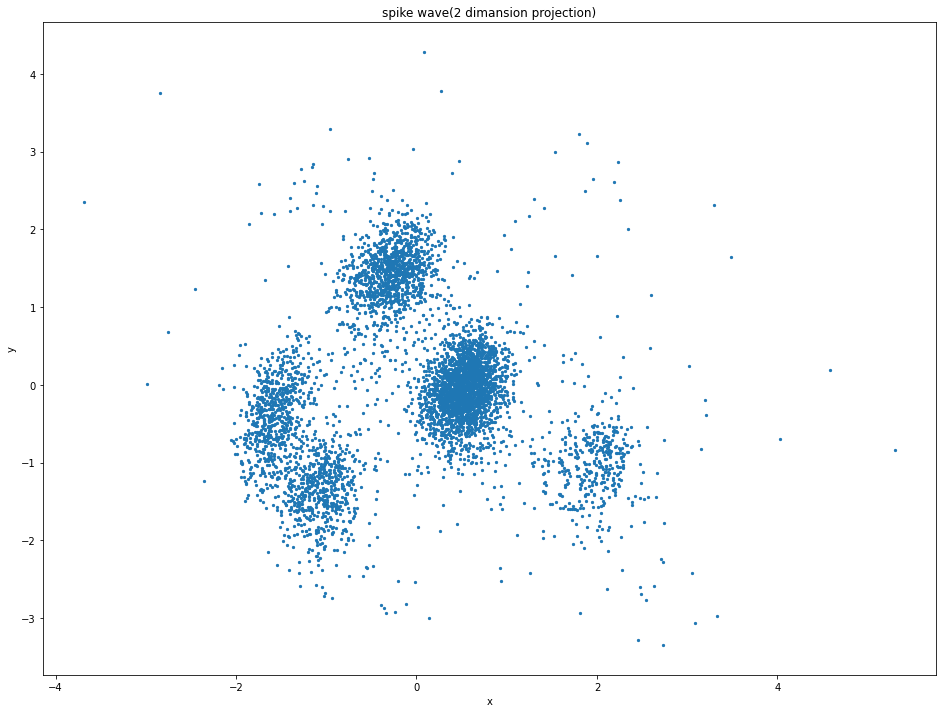

In [15]:
from sklearn.decomposition import PCA

pca_2D = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(spike_data)
spike_data_2D = pca_2D.transform(spike_data)

plt.figure(figsize=(16, 12))
plt.scatter(spike_data_2D[:, 0], spike_data_2D[:, 1], s=5)
plt.title('spike wave(2 dimansion projection)')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 0, 'z')

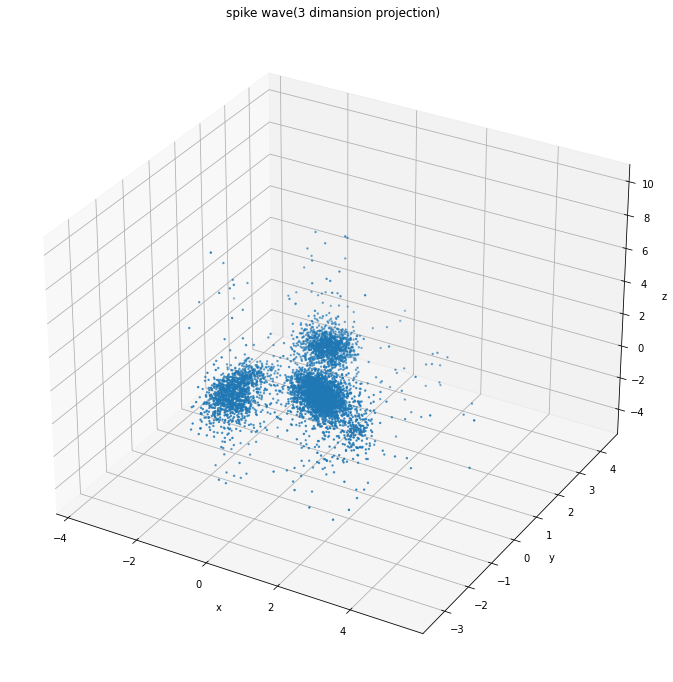

In [46]:
pca_3D = PCA(n_components=3, svd_solver='randomized', whiten=True).fit(spike_data)
spike_data_3D = pca_3D.transform(spike_data)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(spike_data_3D[:, 0], spike_data_3D[:, 1],spike_data_3D[:, 2], s=2)

ax.set_title('spike wave(3 dimansion projection)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

通过PCA降维后，可以明显地看出，spike wave可以大概分为5类，下面使用K-means聚类方法聚类

## Clustering with K-means

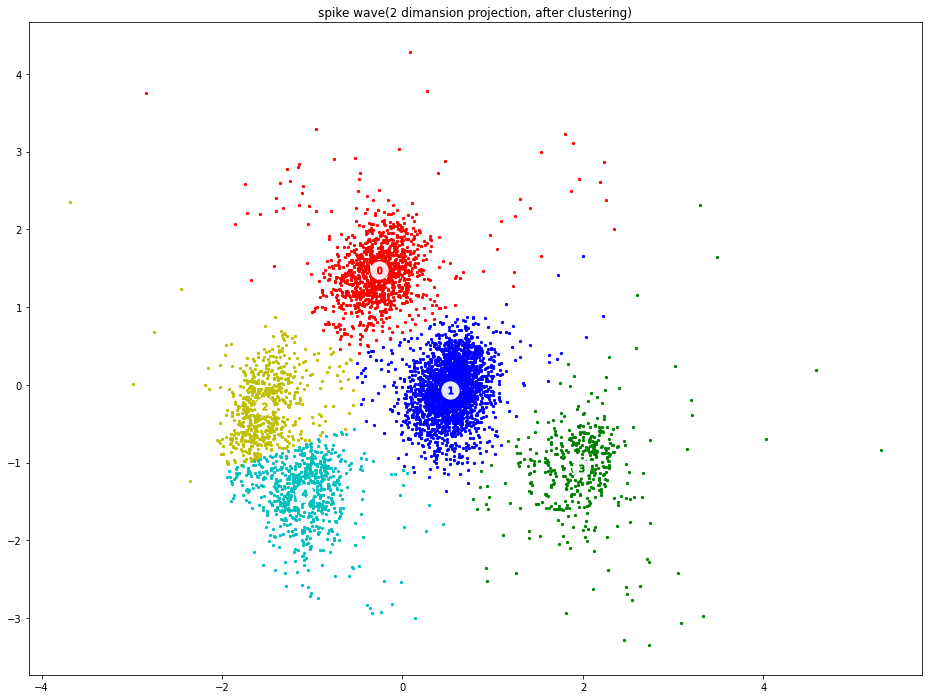

In [47]:
from sklearn.cluster import KMeans

n_clusters = 5
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(spike_data_2D)

labels = kmean.labels_
centers = kmean.cluster_centers_
colors = ['r', 'b', 'y', 'g', 'c']
plt.figure(figsize=(16, 12))
plt.title('spike wave(2 dimansion projection, after clustering)')


# 画出聚类后的点和各类中心点
for c in range(n_clusters):
    cluster = spike_data_2D[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=5, c=colors[c])

plt.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])


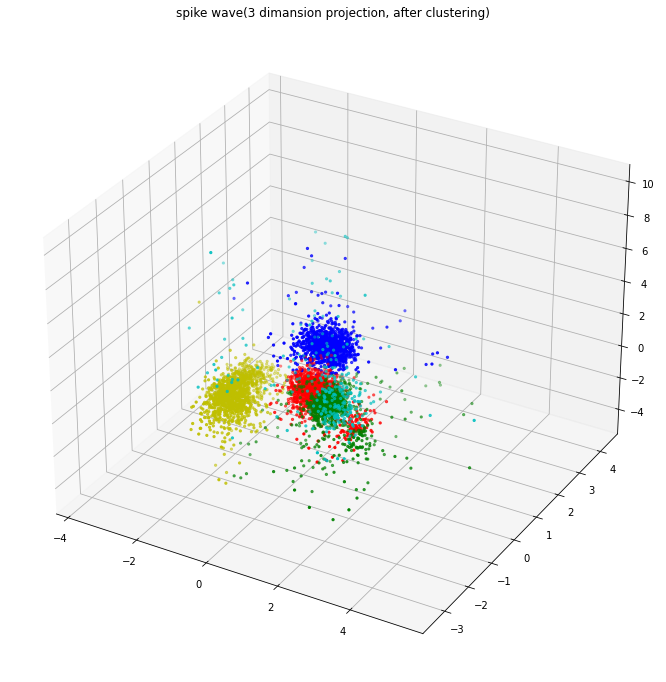

In [48]:
from mpl_toolkits.mplot3d import Axes3D

n_clusters = 5
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(spike_data_3D)

labels = kmean.labels_
centers = kmean.cluster_centers_
colors = ['r', 'b', 'y', 'g', 'c']
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
plt.title('spike wave(3 dimansion projection, after clustering)')


# 画出聚类后的点
for c in range(n_clusters):
    cluster = spike_data_3D[labels == c]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], s=5, c=colors[c])



1. K-means算法思路直接，容易理解，聚类效果不错，虽然是局部最优， 但往往局部最优就够了；处理大数据集的时候，该算法可以保证较好的伸缩性；当簇近似高斯分布的时候，效果非常不错；算法复杂度低。
2. 其最大的缺点是分类数目需要提前人为指定，还有缺点是不适合太离散的分类、样本类别不平衡的分类、非凸形状的分类。
3. 本次实验通过PCA降维后可以比较明显地观察出大致可分为5类，效果较好。

## Plot

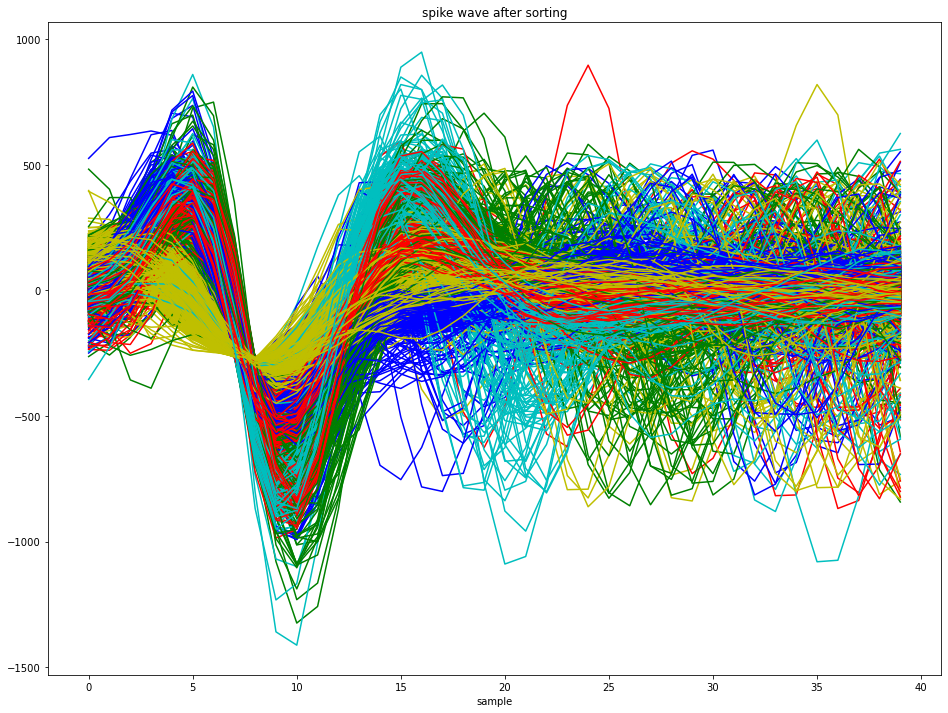

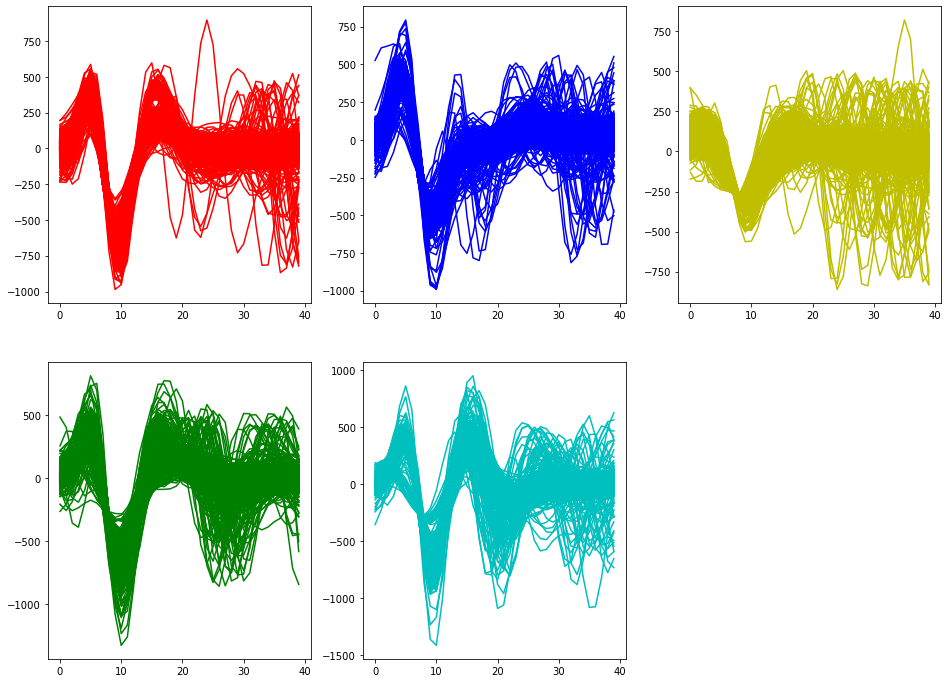

In [52]:
plt.figure(figsize=(16, 12))

for i in range(spike_data.shape[0]):
    plt.plot(range(spike_data.shape[1]), spike_data[i, :], c=colors[labels[i]])

plt.title('spike wave after sorting')
plt.xlabel('sample')

plt.figure(figsize=(16, 12))
for c in range(n_clusters):
    plt.subplot(2, 3, c+1)
    cluster = spike_data[labels == c]
    for i in range(cluster.shape[0]):
        plt.plot(range(cluster.shape[1]), cluster[i, :], c=colors[c])


PCA降维之后使用K-Means分类，将spike wave分成5类之后，重新画出每一类spike wave的时域图像，可以观察到明显的类间差异，表现在采样时间前后spike幅值的变化规律（具体不是很好用文字描述，图片中显示得已经比较清楚）；
同时也能看出每一类的spike wave有一定的类内差异，比较突出的有：红色标示出来的那一类，有几个离群数据非常明显；黄色标示出来的那一类，采样点数20-40时类内差异表现非常明显；绿色标示出来的那一类，类内差异最小。
